In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

In [2]:
rt_reviews_df = pd.read_csv('../Data/rt.reviews.tsv',
                           delimiter='\t',
                           encoding=('unicode_escape'))

In [3]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
rt_reviews_df['rating'].value_counts()

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
3.1/5        1
6.2/10       1
2.6/5        1
9.7          1
3 1/2        1
Name: rating, Length: 186, dtype: int64

In [5]:
tnmovie = pd.read_csv('../Data/tn.movie_budgets.csv')

In [6]:
tnmovie['worldwide_gross'] = tnmovie['worldwide_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['domestic_gross'] = tnmovie['domestic_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['production_budget'] = tnmovie['production_budget'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['profit'] = tnmovie['worldwide_gross'] - tnmovie['production_budget']

tnmovie['perc_return'] = (tnmovie['profit'] / tnmovie['production_budget']) * 100

# Reading data

Read the im.db data with SQL

In [7]:
conn = sqlite3.connect('../Data/im.db')
pd.read_sql('''
SELECT
    *
FROM
    sqlite_master

''',conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Directors SQL

Use SQL query to join tables by primary and foreign keys. This new comprehensive dataframe contains indentifying data regarding directors.

In [8]:
directors_df = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'director'
''',conn)

directors_df

,category,person_id,movie_id,primary_name,primary_title
0,director,nm0398271,tt0111414,Frank Howson,A Thin Life
1,director,nm0362736,tt0323808,Robin Hardy,The Wicker Tree
2,director,nm1145057,tt0417610,Alejandro Chomski,Asleep in the Sun
3,director,nm0707738,tt0469152,Alyssa R. Bennett,Smoking/Non-Smoking
4,director,nm0776090,tt0473032,J. Neil Schulman,Escape from Heaven
...,...,...,...,...,...
146388,director,nm9728620,tt9679036,Julia Beney,"A Girl, a Boy, a Penny and a Very, Very, Very ..."
146389,director,nm10436661,tt9681728,Alexander Zolotukhin,A Russian Youth
146390,director,nm9652770,tt9689618,Xavi Herrero,Moonface. A woman in the war.
146391,director,nm10439725,tt9689618,Xavi Herrero,Moonface. A woman in the war.


# Directors dataframe merge

Merge the directors and tnmovie dataframes on 'primary_title' and 'movie'

In [9]:
directors_df = pd.merge(directors_df,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

Sort director df by 'profit'.

In [10]:
directors_df.sort_values(by='profit',
                   ascending=False,
                   inplace=True)

directors_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
1801,director,nm3786927,tt1775309,Atsushi Wada,Avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
3775,director,nm10047650,tt8852130,Ravi Punj,Titanic,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
3168,director,nm0751577,tt4154756,Anthony Russo,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
3169,director,nm0751648,tt4154756,Joe Russo,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
353,director,nm1119880,tt0369610,Colin Trevorrow,Jurassic World,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,director,nm0761498,tt7504726,Chris Sanders,Call of the Wild,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000,-100.000000
3552,director,nm0043742,tt5519340,David Ayer,Bright,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000,-100.000000
2628,director,nm0336620,tt2283336,F. Gary Gray,Men in Black: International,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-97.181818
1111,director,nm0920425,tt1305591,Simon Wells,Mars Needs Moms,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,-73.633495


# Top Directors by Profit

Count the values associated with the 15 most common directors that appear in the sorted directors df.

In [11]:
top_15_dirs = directors_df.value_counts('primary_name').head(15)

top_15_dirs

primary_name
Tim Story             9
David Gordon Green    8
Steven Spielberg      8
Steven Soderbergh     7
Ridley Scott          7
Clint Eastwood        6
Tim Burton            6
Peter Berg            6
Jaume Collet-Serra    6
Denis Villeneuve      6
Jon M. Chu            6
Guillermo del Toro    5
Ron Howard            5
Robert Rodriguez      5
David O. Russell      5
dtype: int64

Make a list of director names using index.

In [12]:
top_15_dirs_list = list(top_15_dirs.index)

top_15_dirs_list

['Tim Story',
 'David Gordon Green',
 'Steven Spielberg',
 'Steven Soderbergh',
 'Ridley Scott',
 'Clint Eastwood',
 'Tim Burton',
 'Peter Berg',
 'Jaume Collet-Serra',
 'Denis Villeneuve',
 'Jon M. Chu',
 'Guillermo del Toro',
 'Ron Howard',
 'Robert Rodriguez',
 'David O. Russell']

Iterate through the list of top 15 directors.

Next, locate the rows and columns where the 'primary_name' is equal to the director's name.

Then, append the average profit for each movie the director directed in to a new list.

In [13]:
avg_dir = []

for director in top_15_dirs_list:
    directors_filtered = directors_df.loc[directors_df['primary_name'] == director]
    avg_dir.append(directors_filtered.profit.mean())
    
avg_dir

[48457857.44444445,
 42364834.5,
 164754974.375,
 45581726.85714286,
 176967321.2857143,
 137916026.66666666,
 190861143.33333334,
 34929965.833333336,
 75478617.16666667,
 57327861.166666664,
 150242933.66666666,
 97190623.6,
 62628345.4,
 48152771.4,
 113364526.0]

Create a dataframe using zip with the top 15 directors and average profit lists

In [14]:
directing_df = pd.DataFrame(list(zip(top_15_dirs_list, avg_dir)),
               columns =['director_name', 'average_profit'])

Sort the dataframe by 'average_profit'

In [15]:
directing_df.sort_values(by='average_profit', inplace=True, ascending=False)

# Directors data visualization

In [16]:
#fig, ax = plt.subplots(figsize=(14,9))

#x = rev_dir
#y = top_20_dirs

#ax.set_title("Top 20 Directors in Highest Earning Movies")
#ax.set_ylabel("Directors")
#ax.set_xlabel("Average Profit Per Movie")

#ax.ticklabel_format(axis='x', style='plain')

#ax.barh(width=x, y=y);

Create a barh using seaborn with the average profit for each movie the director directed on the x-axis and the top 15 directors list on the y-axis. 

Change x-axis units from scientific notation to easily readable numbers.

C:\Users\alvaro\AppData\Local\Temp\ipykernel_2540\1476798698.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);


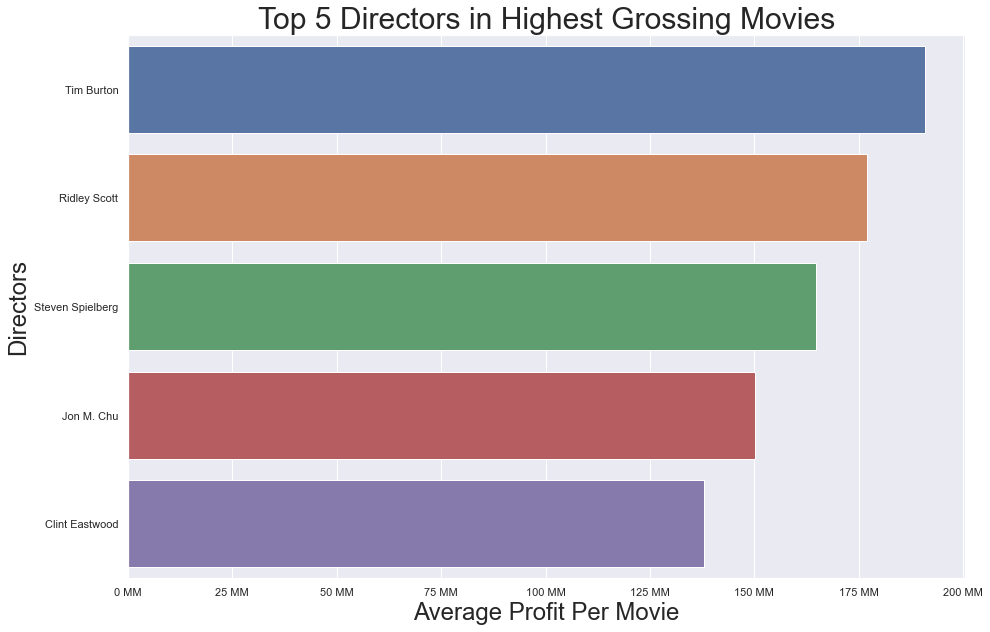

In [29]:
sns.set(style="whitegrid")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_profit', y='director_name', data=directing_df.head(5))

plt.ticklabel_format(axis='x', style='plain')
plt.title('Top 5 Directors in Highest Grossing Movies', fontsize=30)
plt.xlabel('Average Profit Per Movie', fontsize=24)
plt.ylabel('Directors', fontsize=24)

ticks_loc = g.get_xticks().tolist()
#g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))

#g.set_xticklabels([label_format.format(x) for x in ticks_loc])

xlabels = ['{:,.0f}'.format(x) + ' MM' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

# Insights

Directors draw in audiences! Steven Spielbergs, Tim Burtons, and Ridley Scotts 
create universes that pull over $100 million in box office. These directors have unqiue, 
beloved fimlamking styles. And their fans come out in droves to experience them in theaters. 
Sometimes multiple times. With one these visionaries at the helm, Microsoft may likley produce 
an instant classic and a blockbuster hit at the same time.

# Actors SQL

Use SQL query to join tables by primary and foreign keys. This new comprehensive dataframe contains indentifying data regarding actors.

In [18]:
actors = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'actor' 
    or
    category = 'actress'
''',conn)

actors

,category,person_id,movie_id,primary_name,primary_title
0,actor,nm0246005,tt0111414,Tommy Dysart,A Thin Life
1,actress,nm3579312,tt0323808,Brittania Nicol,The Wicker Tree
2,actor,nm2694680,tt0323808,Henry Garrett,The Wicker Tree
3,actor,nm0574615,tt0323808,Graham McTavish,The Wicker Tree
4,actress,nm0502652,tt0323808,Jacqueline Leonard,The Wicker Tree
...,...,...,...,...,...
402680,actor,nm10397910,tt9681728,Danil Tyabin,A Russian Youth
402681,actor,nm10439726,tt9689618,Christian Lacroix,Moonface. A woman in the war.
402682,actor,nm10439727,tt9689618,Christine Spengler,Moonface. A woman in the war.
402683,actor,nm10439724,tt9689618,Phillippe Warner,Moonface. A woman in the war.


# Actors dataframe merge

Merge the actors and tnmovie dataframes on 'primary_title' and 'movie'

In [19]:
actors_df = pd.merge(actors,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

actors_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
0,actor,nm0000982,tt0475290,Josh Brolin,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
1,actor,nm0000123,tt0475290,George Clooney,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
2,actor,nm2403277,tt0475290,Alden Ehrenreich,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
3,actor,nm0000146,tt0475290,Ralph Fiennes,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
4,actor,nm0006763,tt10300704,Jackie Shroff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,actor,nm10487076,tt9805168,E. Iderbold,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13363,actor,nm10480867,tt9805168,N. Yalalt,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13364,actor,nm10487077,tt9805168,A. Önörjargal,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13365,actor,nm9457389,tt7694546,Dongchao Tai,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,45080579,30.053719


# Top Actors by Profit

Sort actors df by 'profit'

In [20]:
actors_df.sort_values(by='profit', ascending=False, inplace=True)

Count the values associated with the 15 most common names that appear in the sorted actors df.

In [21]:
top_15_actors = actors_df.value_counts('primary_name').head(15)

top_15_actors

primary_name
Mark Wahlberg          19
Dwayne Johnson         19
Robert De Niro         18
Liam Neeson            18
Steve Carell           17
Channing Tatum         17
Joel Edgerton          17
Kevin Hart             16
Johnny Depp            16
Matthew McConaughey    16
Nicolas Cage           15
Michael Fassbender     15
Anna Kendrick          15
Tom Hardy              15
Jennifer Lawrence      15
dtype: int64

Make a list of actor names using index.

In [22]:
top_15_actors = list(top_15_actors.index)

top_15_actors

['Mark Wahlberg',
 'Dwayne Johnson',
 'Robert De Niro',
 'Liam Neeson',
 'Steve Carell',
 'Channing Tatum',
 'Joel Edgerton',
 'Kevin Hart',
 'Johnny Depp',
 'Matthew McConaughey',
 'Nicolas Cage',
 'Michael Fassbender',
 'Anna Kendrick',
 'Tom Hardy',
 'Jennifer Lawrence']

Iterate through the list of top 15 actors.

Next, locate the rows and columns where the 'primary_name' is equal to the actors's name.

Then, append the average profit for each movie the actor appeared in to a new list.

In [23]:
avg_actor = []

for actor in top_15_actors:
    actors_filtered = actors_df.loc[actors_df['primary_name'] == actor]
    avg_actor.append(actors_filtered.profit.mean())
    
avg_actor[0]

137891808.0526316

Create a dataframe using zip with the top 15 actors and average profit lists

In [24]:
acting_df = pd.DataFrame(list(zip(top_15_actors, avg_actor)),
               columns =['actor_name', 'average_profit'])

Sort the dataframe by 'average_profit'

In [25]:
acting_df.sort_values(by='average_profit', inplace=True, ascending=False)

# Actors data visualization

In [26]:
#fig, ax = plt.subplots(figsize=(14,9))


#x = rev_actor
#y = top_25_actors

#ax.set_title("Top 25 Actors in Highest Earning Movies")
#ax.set_ylabel("Actors")
#ax.set_xlabel("Average Profit Per Movie")

#ax.ticklabel_format(axis='x', style='plain')

#xlabels = ['{:,.0f}'.format(x) + ' MM' for x in ax.get_xticks()/1000000]
#ax.set_xticklabels(xlabels)

#ax.barh(width=x, y=y);

Create a barh using seaborn with the average profit for each movie the actor appeared in on the x-axis and the top 15 actors list on the y-axis.

Change x-axis units from scientific notation to easily readable numbers.

C:\Users\alvaro\AppData\Local\Temp\ipykernel_2540\3802444047.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);


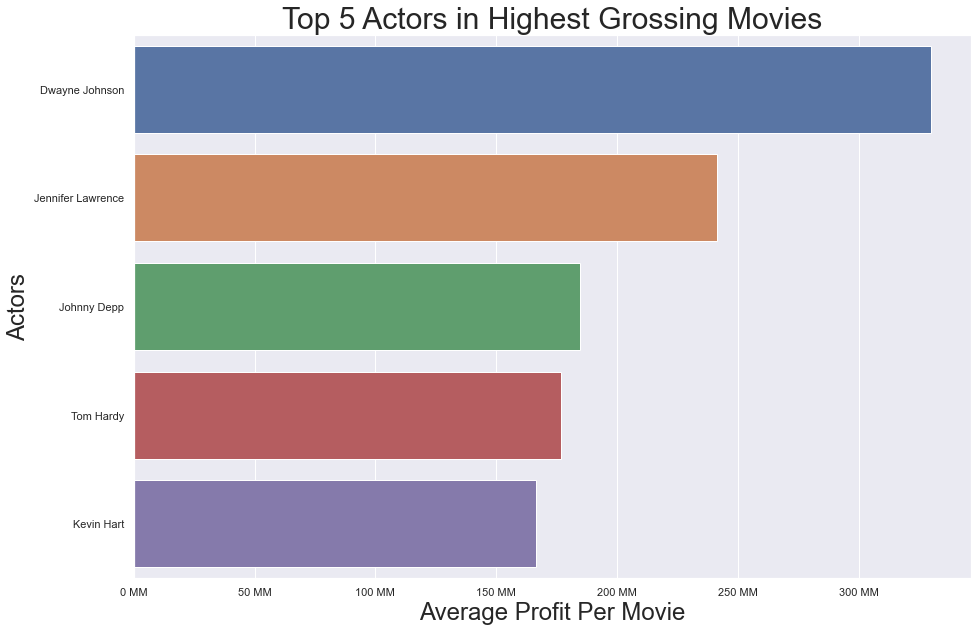

In [31]:
sns.set(style="whitegrid")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_profit', y='actor_name', data=acting_df.head(5))

plt.title('Top 5 Actors in Highest Grossing Movies', fontsize=30)
plt.xlabel('Average Profit Per Movie', fontsize=24)
plt.ylabel('Actors', fontsize=24)

plt.ticklabel_format(axis='x', style='plain')

xlabels = ['{:,.0f}'.format(x) + ' MM' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

# Insights

Movie star appeal is a major box office draw! Actors like Dwayne Johnson, Jennifer Lawrence, and Kevin Hart not only makes us laugh and cry, they also inspire us. These actors average over $150 million per film because they have an army of die-hard fans always ready to invade the next midnight premiere. Casting one these stars in a Microsoft movie, may likley drive high box office sales.